# Predictive Modeling for Customer Churn - Internship Project


**Data Set Information:** The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.




## Importing Required Libraries

In [1]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("data/bank.csv")
data.head()

,"age"";""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


## Data Preprocessing

In [3]:
colmns = re.sub(";", " ", data.columns[0])
colmns = re.sub("\"", "", colmns)
colmns = colmns.split()

# cleaning each row of data 
def clean_data(row):
    row = re.sub(";", " ", row)
    row = re.sub("\"", "", row)
    row = row.split()
    return row

data1 = data.copy()
data1.iloc[:,0] = data1.iloc[:,0].map(lambda x: clean_data(x))
data1

,"age"";""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"
0,"[30, unemployed, married, primary, no, 1787, n..."
1,"[33, services, married, secondary, no, 4789, y..."
2,"[35, management, single, tertiary, no, 1350, y..."
3,"[30, management, married, tertiary, no, 1476, ..."
4,"[59, blue-collar, married, secondary, no, 0, y..."
...,...
4516,"[33, services, married, secondary, no, -333, y..."
4517,"[57, self-employed, married, tertiary, yes, -3..."
4518,"[57, technician, married, secondary, no, 295, ..."
4519,"[28, blue-collar, married, secondary, no, 1137..."


In [4]:
# creating columns from "columns" list which we created above and filling values from row lists
idx = 0
for row in data1.iloc[:,0]:
    if len(row) == 17:
        i = 0
        for col in colmns:
            data1.loc[idx,col] = row[i]
            i += 1
    idx += 1
    
data1.drop(data1.columns[0], axis=1, inplace=True)
df = data1.copy()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
convert_dtype = {"age":int, "balance":int, "day":int, "duration":int, "campaign":int, "pdays":int, "previous":int}
df = df.astype(convert_dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int32 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int32 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int32 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int32 
 12  campaign   4521 non-null   int32 
 13  pdays      4521 non-null   int32 
 14  previous   4521 non-null   int32 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int32(7), object(10)
memory usage: 476.9+ KB


In [6]:
df.shape

(4521, 17)

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
# Handling Catergorical and Numerical Data 

categorical_cols = [col for col in df.columns if df[col].dtype == "O"]
numerical_cols = [col for col in df.columns if df[col].dtype != "O"]

In [10]:
df.loc[:,numerical_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## EDA

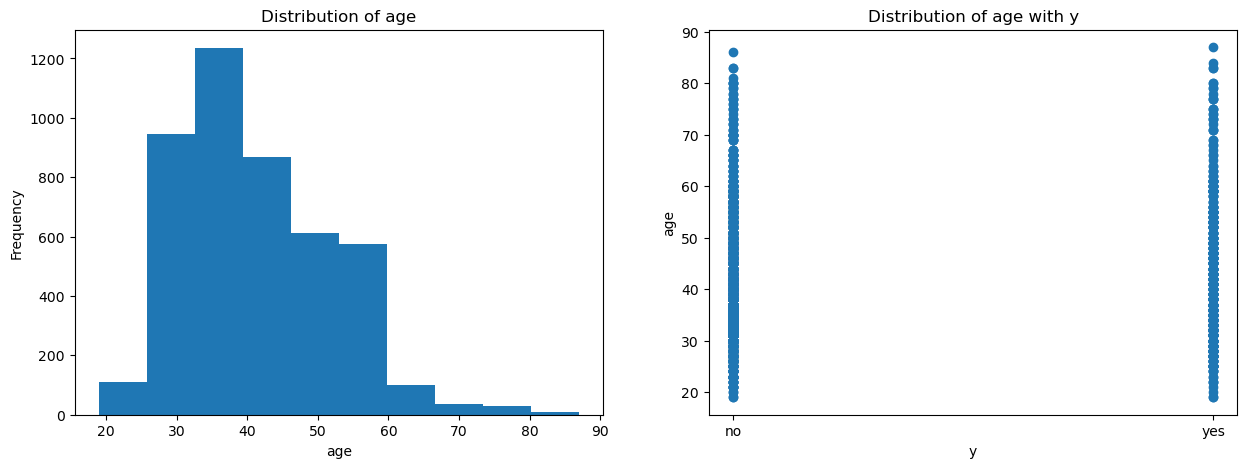

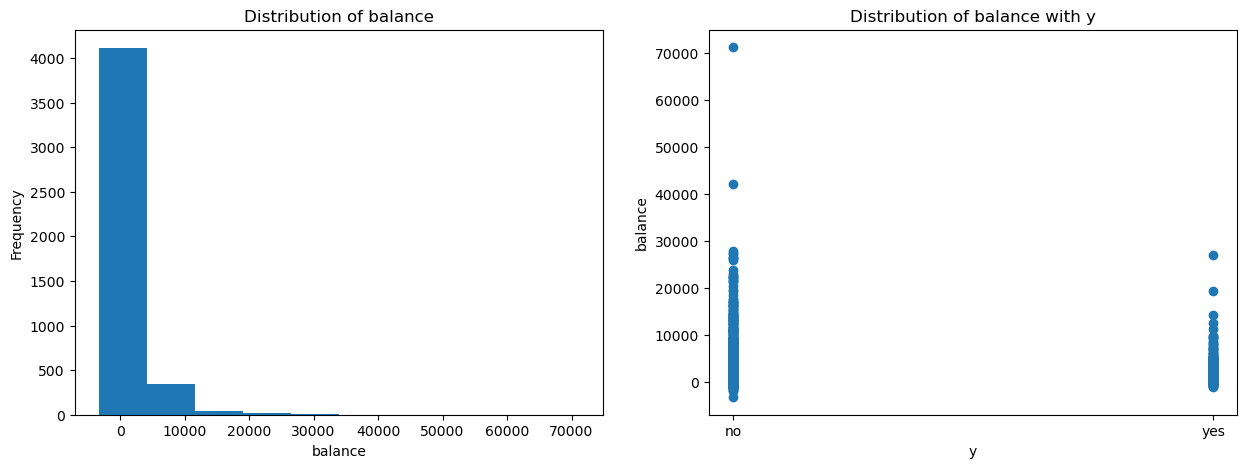

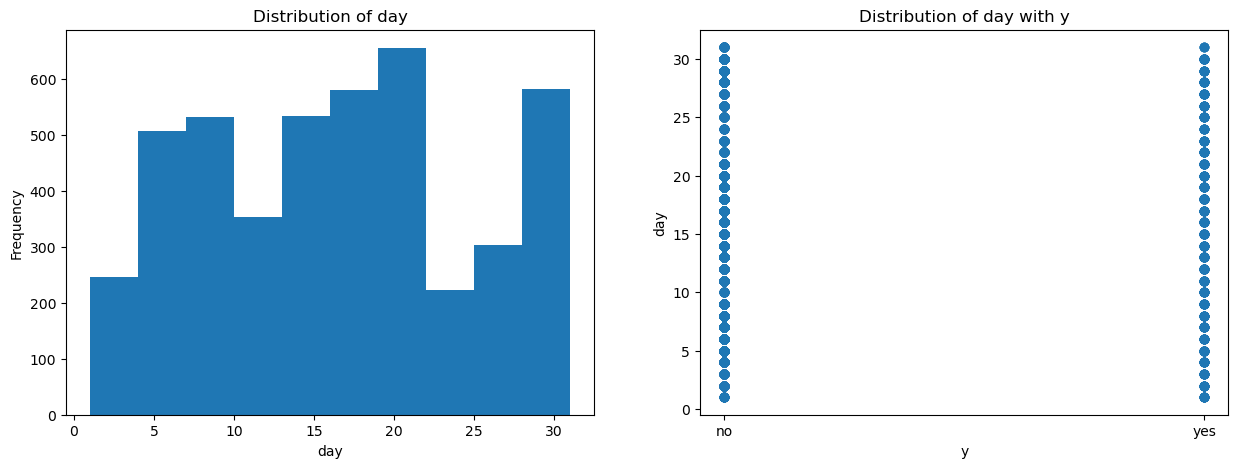

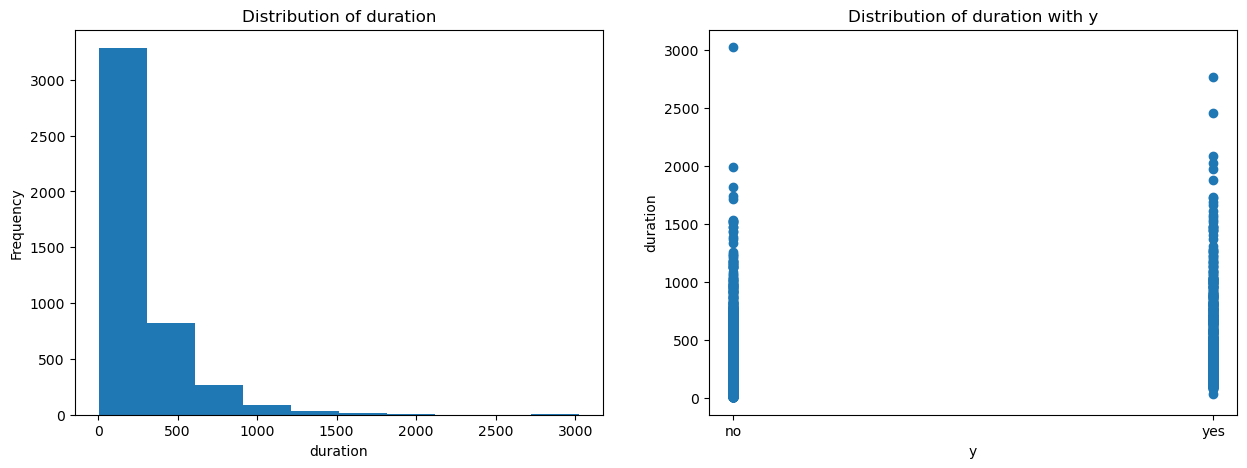

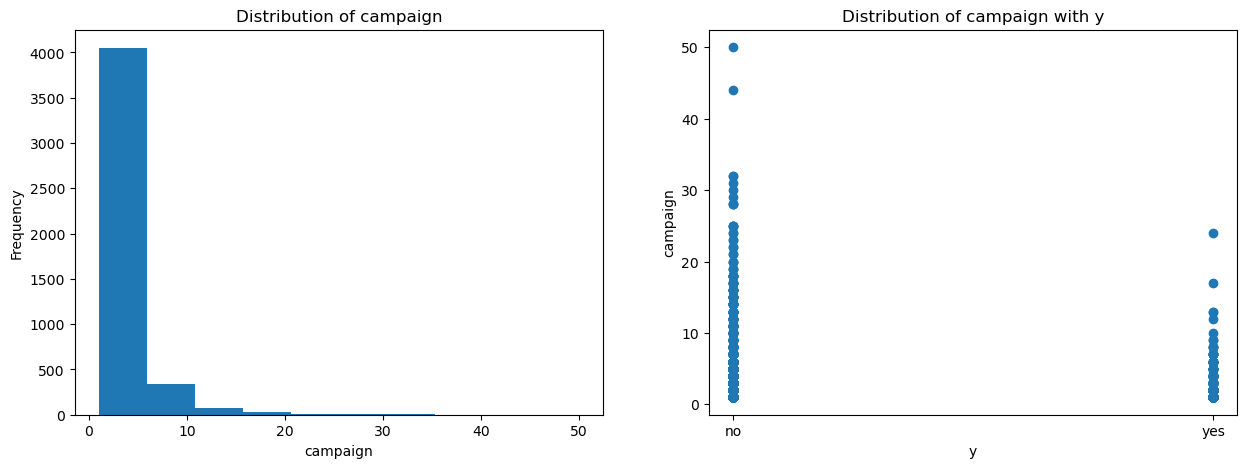

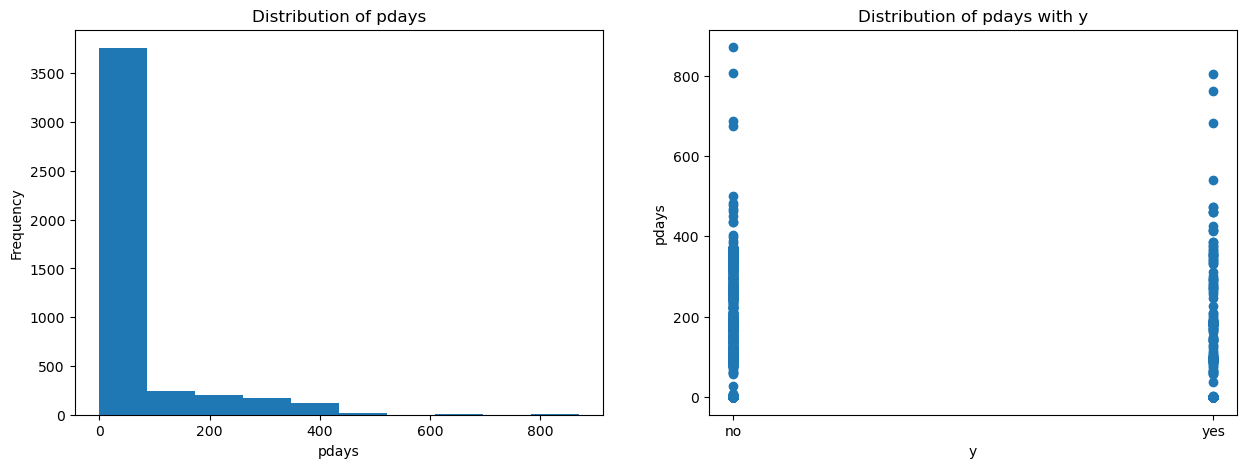

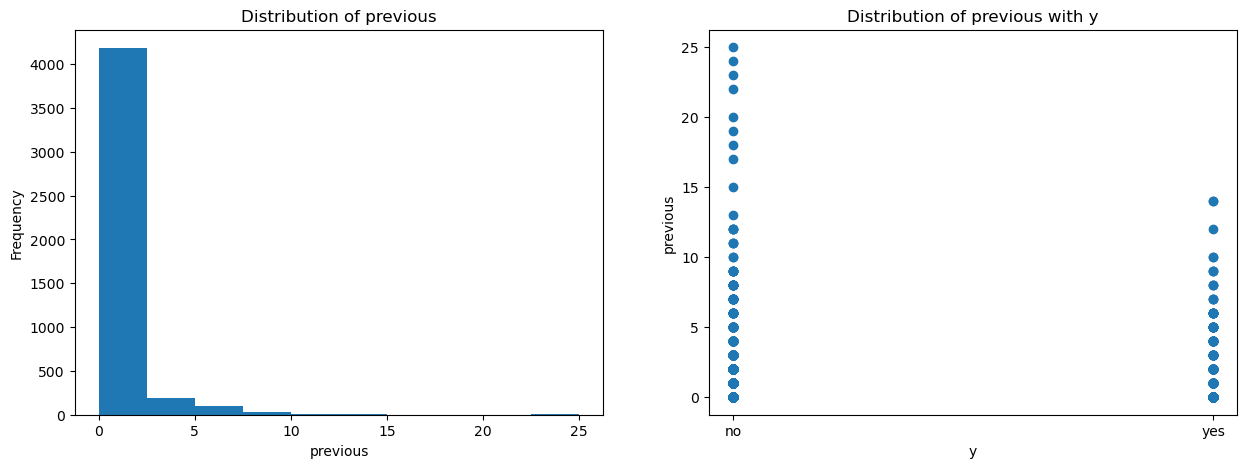

In [11]:
# Distribution of values in numerical columns
for col in numerical_cols:
    plt.figure(figsize=(15,5))
    right = plt.subplot(1,2,1)
    plt.hist(df[col])
    right.set_ylabel("Frequency")
    right.set_xlabel(col)
    right.set_title(f"Distribution of {col}")
    left = plt.subplot(1,2,2)
    plt.scatter(df["y"],df[col])
    left.set_ylabel(col)
    left.set_xlabel("y")
    left.set_title(f"Distribution of {col} with y")
    plt.show()

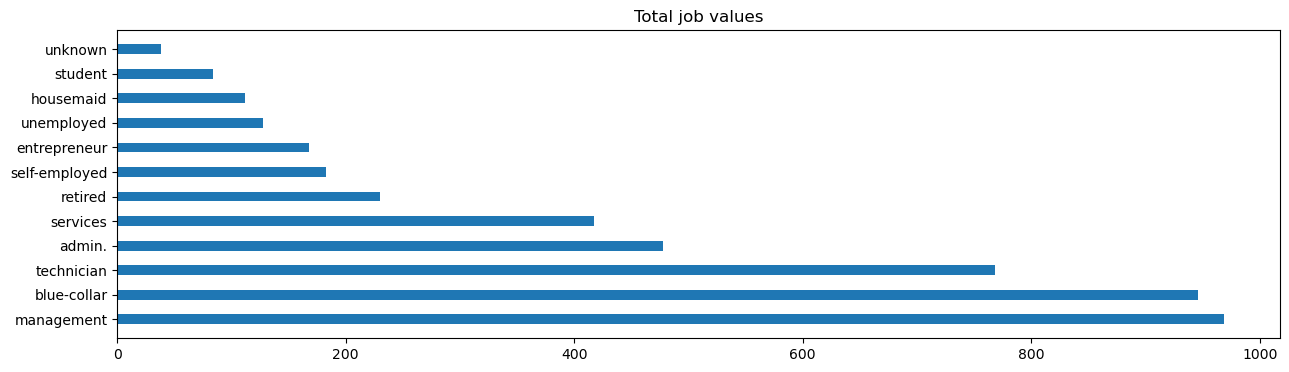

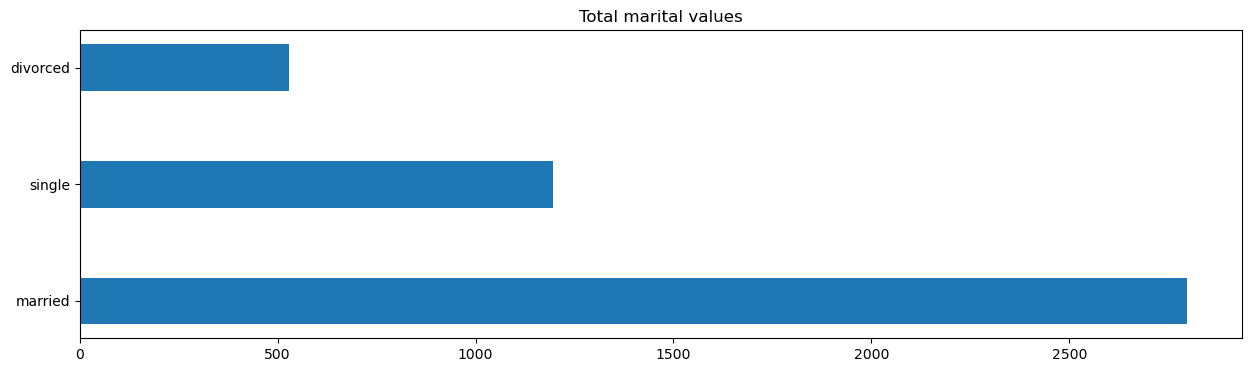

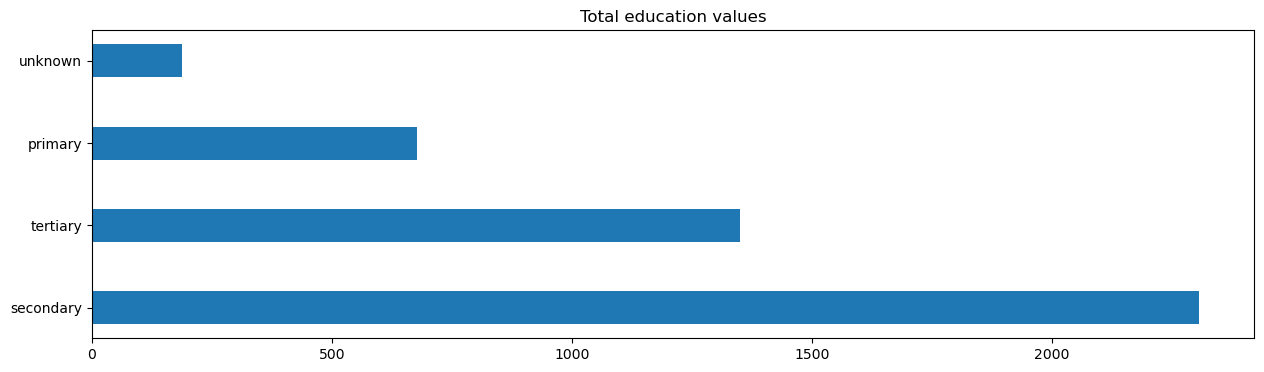

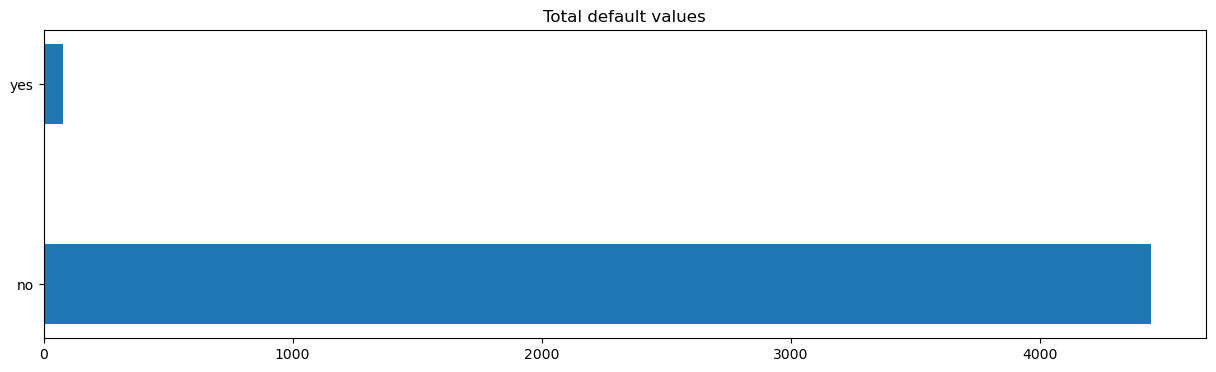

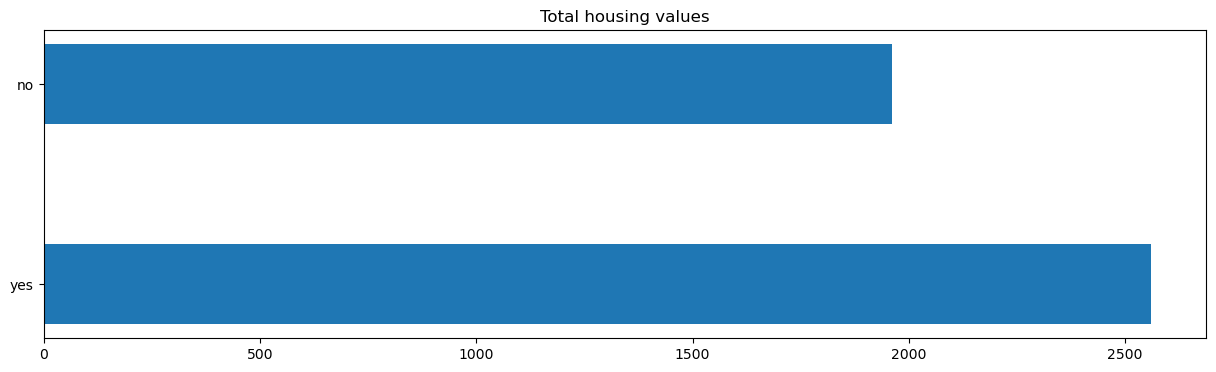

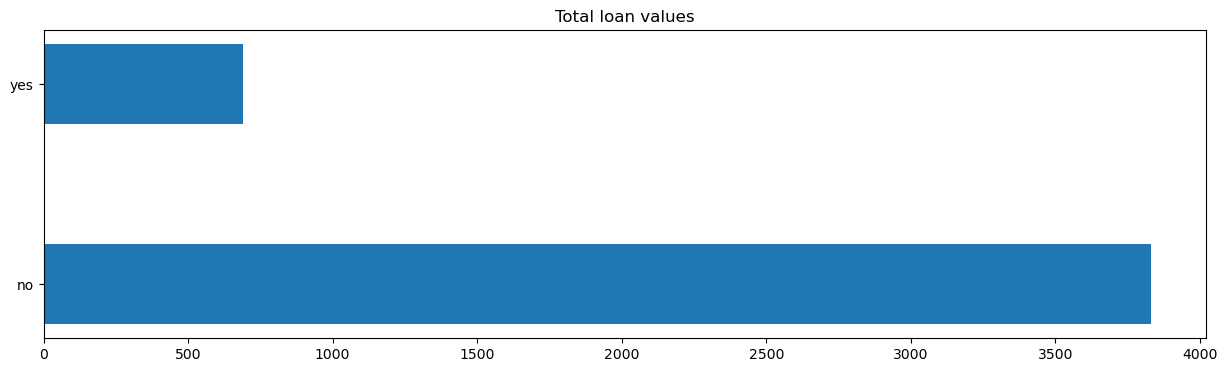

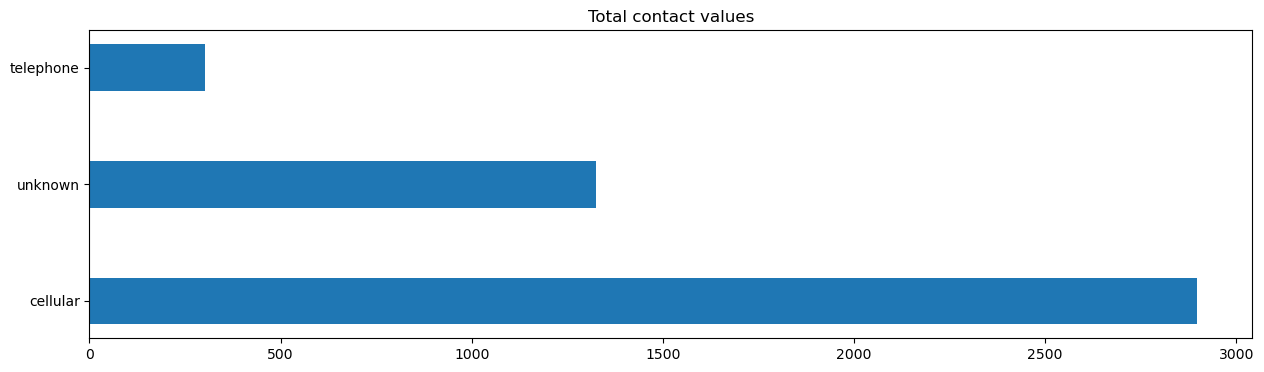

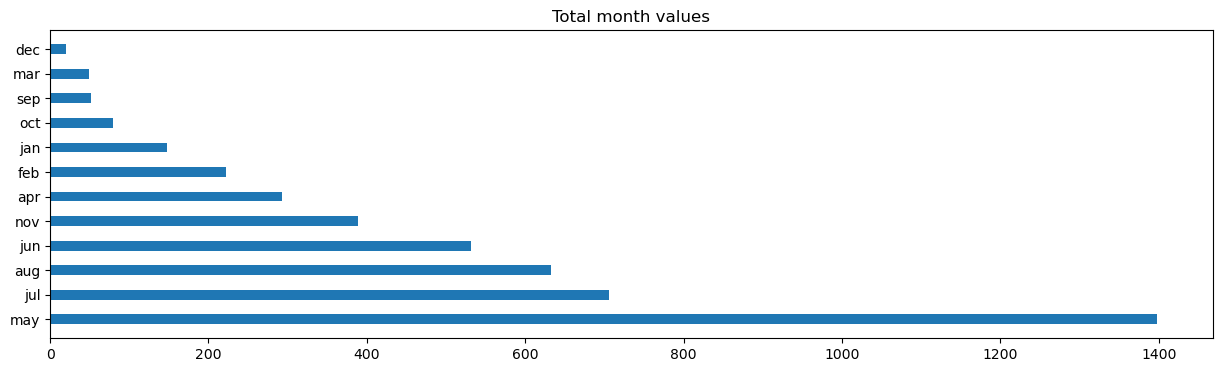

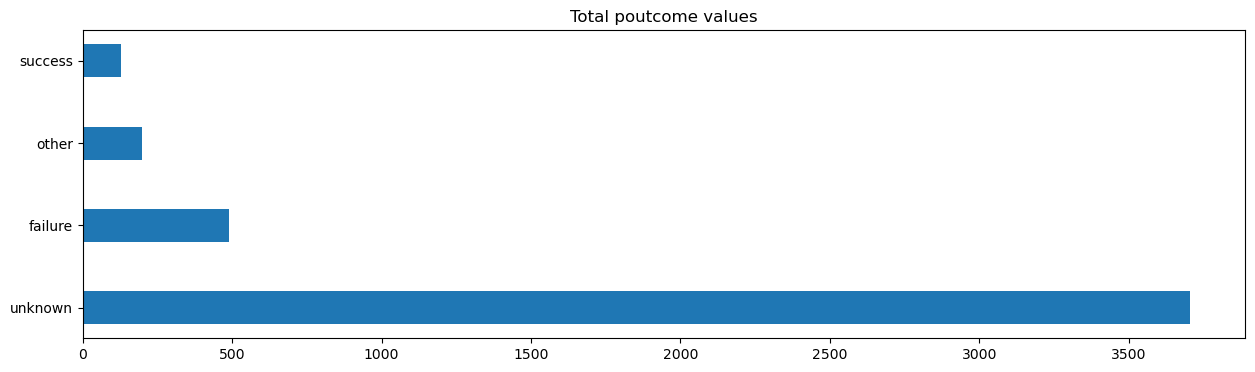

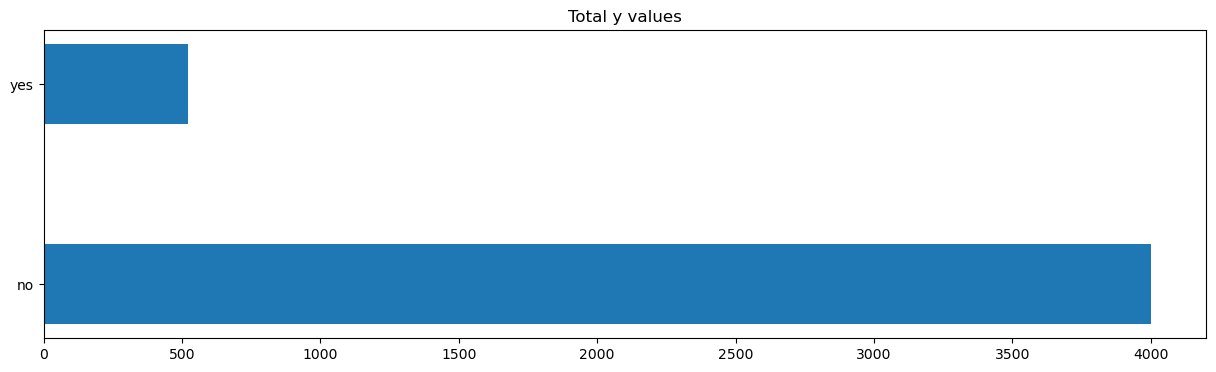

In [12]:
# checking total unique values in categorical column 
for col in categorical_cols:
    uvalues = df[col].value_counts()
    plt.figure(figsize=(15, 4))
    plt.barh(uvalues.index , uvalues, height=0.4)
#     plt.bar( uvalues.index, uvalues)
    plt.title(f"Total {col} values")
    plt.show()


In [13]:
#Encoding
labelencoder_X = LabelEncoder()

df['month']       = labelencoder_X.fit_transform(df['month']) 

# Encoding Categorical Variables
df["y"] = df["y"].map(lambda x: 1 if x=="yes" else 0)

df["day_of_year"] = df["day"] + df["month"]
df.drop(["month","day"], axis=1, inplace=True)

# duration column is in seconds we will convert it in minutes
df["duration"] = df["duration"] / 60

# Changing order of columns
df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,14]]
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,1.316667,1,-1,0,unknown,29,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,3.666667,1,339,4,failure,19,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,3.083333,1,330,1,failure,16,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3.316667,4,-1,0,unknown,9,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,3.766667,1,-1,0,unknown,13,0


In [14]:
from category_encoders.count import CountEncoder

categorical_cols.remove("month")
categorical_cols.remove("y")
col_to_transform = [col for col in categorical_cols if col != "day_of_year" and col != "y"]

CEnc = CountEncoder(cols=col_to_transform, normalize=True)
transformed_data = CEnc.fit_transform(X=df)

transformed_data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year,y
0,30,0.028312,0.618668,0.149967,0.98319,1787,0.433975,0.847158,0.640566,1.316667,1,-1,0,0.819509,29,0
1,33,0.092236,0.618668,0.510064,0.98319,4789,0.566025,0.152842,0.640566,3.666667,1,339,4,0.108383,19,0
2,35,0.214333,0.264543,0.298607,0.98319,1350,0.566025,0.847158,0.640566,3.083333,1,330,1,0.108383,16,0
3,30,0.214333,0.618668,0.298607,0.98319,1476,0.566025,0.152842,0.292856,3.316667,4,-1,0,0.819509,9,0
4,59,0.209246,0.618668,0.510064,0.98319,0,0.566025,0.847158,0.292856,3.766667,1,-1,0,0.819509,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0.092236,0.618668,0.510064,0.98319,-333,0.566025,0.847158,0.640566,5.483333,5,-1,0,0.819509,35,0
4517,57,0.040478,0.618668,0.298607,0.01681,-3313,0.566025,0.152842,0.292856,2.550000,1,-1,0,0.819509,17,0
4518,57,0.169874,0.618668,0.510064,0.98319,295,0.433975,0.847158,0.640566,2.516667,11,-1,0,0.819509,20,0
4519,28,0.209246,0.618668,0.510064,0.98319,1137,0.433975,0.847158,0.640566,2.150000,4,211,3,0.043574,9,0


In [15]:
transformed_data['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

**Data is highly Imbalanced**

### Fixing IMBALANCED DATASET 

In [16]:
df_majority = transformed_data[transformed_data['y'] == 0]
df_minority = transformed_data[transformed_data['y'] == 1]


In [17]:
#IMBALANCED DATASET FIX
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= int(4640*2),    
                                 random_state=123) 


In [18]:
#IMBALANCED DATASET FIX
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
y_new = df_upsampled['y']

In [19]:
df_upsampled.shape

(13280, 16)

In [20]:
y_new.value_counts()

1    9280
0    4000
Name: y, dtype: int64

## Model Building

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import resample

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop('y', axis = 1), y_new, test_size = 0.1942313295, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


In [23]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy').mean())

In [25]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier'],
                'Score':  [RFCCV]})

models.sort_values(by='Score', ascending=False)


,Models,Score
0,Random Forest Classifier,0.983364


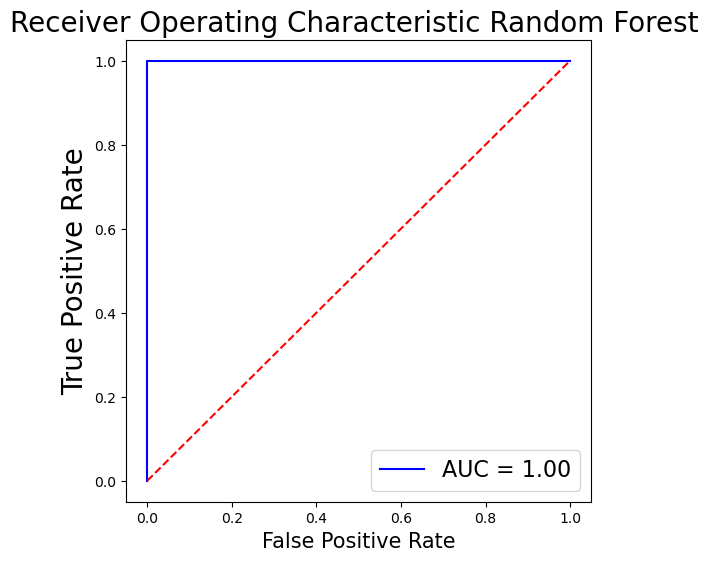

In [26]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [27]:
print(classification_report(y_test, rfcpred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       784
           1       0.98      1.00      0.99      1796

    accuracy                           0.99      2580
   macro avg       0.99      0.98      0.98      2580
weighted avg       0.99      0.99      0.99      2580



In [ ]:
print('RFC Confusion Matrix\n', confusion_matrix(y_test, rfcpred))

In [29]:
print('RFC Reports\n',classification_report(y_test, rfcpred))

RFC Reports
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       784
           1       0.98      1.00      0.99      1796

    accuracy                           0.99      2580
   macro avg       0.99      0.98      0.98      2580
weighted avg       0.99      0.99      0.99      2580



In [ ]:
print('RFC Confusion Matrix\n', confusion_matrix(y_test, rfcpred))

In [31]:
print('Specificity/ Recall 0 : ', round(6739 /(6739 + 365),2))

Specificity/ Recall 0 :  0.95


In [32]:
print('Sensitivity/ Recall 1 : ',round(1623 / (1623 + 175),3))
print('Sensitivity/ Recall 1 : ',round(metrics.recall_score(y_test, rfcpred),2))


Sensitivity/ Recall 1 :  0.903
Sensitivity/ Recall 1 :  1.0


In [ ]:
print('RFC Confusion Matrix\n', confusion_matrix(y_test, rfcpred))

In [34]:
print('Precision 0 : ',round(6739 / (6739 + 175),2))

Precision 0 :  0.97


In [35]:
print('Precision 1 : ',round(1623 / (1623 + 365),2))
print('Precision 1 : ',round(metrics.precision_score(y_test, rfcpred),2))

Precision 1 :  0.82
Precision 1 :  0.98


In [36]:
# F1-SCORE
F1_0 = 2*0.97*0.95/(0.97+0.95)
print('F1-Score 0: ',round(F1_0,2))
F1_1 = 2*0.82*0.9/(0.82+0.9)
print('F1-Score 1: ',round(F1_1,2))



F1-Score 0:  0.96
F1-Score 1:  0.86


In [37]:
AVG_precision =  (0.97*(7104/8902))+ (0.82*(1798/8902))
print('AVT/Total Precision', round(AVG_precision,2))

AVT/Total Precision 0.94


In [38]:
AVG_Recall =  (0.95*(7104/8902))+ (0.9*(1798/8902))
print('AVT/Total Recall', round(AVG_Recall,2))


AVT/Total Recall 0.94


In [39]:
AVG_f1 =  (0.96*(7104/8902))+ (0.86*(1798/8902))
print('AVT/Total F1-Score', round(AVG_f1,2))


AVT/Total F1-Score 0.94
